## Lab: Forearm movements and LQR model


In [21]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scipy 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
    --------------------------------------- 0.6/44.1 MB 17.6 MB/s eta 0:00:03
   - -------------------------------------- 1.8/44.1 MB 22.6 MB/s eta 0:00:02
   -- ------------------------------------- 3.3/44.1 MB 26.0 MB/s eta 0:00:02
   --- ------------------------------------ 4.0/44.1 MB 23.4 MB/s eta 0:00:02
   ----- ---------------------------------- 5.6/44.1 MB 25.4 MB/s eta 0:00:02
   ------ --------------------------------- 7.3/44.1 MB 27.3 MB/s eta 0:00:02
   ------- -------------------------------- 8.6/44.1 MB 29.1 MB/s eta 0:00:02
   --------- ------------------------------ 10.3/44.1 MB 28.4 MB/s eta 0:00:02
   ---------- ----------------------------- 12.0/44.1 MB 31.1 MB/s eta 0:


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize


### 1 Visualizing and pre-processing the data


Task 1. Open the file with any text editor to see how the file is formatted. Then, write a Python script
to load movement data into a list.


In [11]:
# the file is a csv file with ; as separator
path = 'data/two_movements.csv'

file_task1 = open ( path , "r")  # open file in read ( ’r ’) mode
for line in file_task1 : # iterate over each line
    values = line . split (';')# to get values from line , use line . split ( ’; ’
    print(values)

['#### Each pair is (time, position)\n']
['Movement number 1\n']
['2.3712', '4153.0000\n']
['2.3873', '4153.0000\n']
['2.3912', '4155.0000\n']
['2.4072', '4158.0000\n']
['2.4112', '4175.0000\n']
['2.4272', '4273.0000\n']
['2.4312', '4461.0000\n']
['2.4472', '4715.0000\n']
['2.4512', '5003.0000\n']
['2.4672', '5338.0000\n']
['2.4712', '5716.0000\n']
['2.4872', '6113.0000\n']
['2.4912', '6540.0000\n']
['2.5072', '6998.0000\n']
['2.5112', '7457.0000\n']
['2.5272', '7944.0000\n']
['2.5312', '8435.0000\n']
['2.5472', '8941.0000\n']
['2.5512', '9426.0000\n']
['2.5672', '9915.0000\n']
['2.5712', '10394.0000\n']
['2.5872', '10875.0000\n']
['2.5912', '11345.0000\n']
['2.5992', '11814.0000\n']
['2.6192', '12288.0000\n']
['2.6232', '12759.0000\n']
['2.6272', '13215.0000\n']
['2.6472', '13623.0000\n']
['2.6512', '14019.0000\n']
['2.6592', '14371.0000\n']
['2.6792', '14698.0000\n']
['2.6832', '15002.0000\n']
['2.6992', '15282.0000\n']
['2.7032', '15542.0000\n']
['2.7192', '15791.0000\n']
['2.7232',

Task 2. If you look at the time component of the signal, you notice that the sample times are uneven.
This will cause problems, so you first need to resample the data to have equally spaced samples. Do
that.

In [12]:
file_task1 = 'data/two_movements.csv'

mouvement_1 = np.ndarray((888,2))
mouvement_2 = np.ndarray((888,2))

is_mvt1 = False
is_mvt2 = False

with open (path, "r") as file_task1 : # open file in read ( ’ r ’) mode
    for i, line in enumerate(file_task1) : # iterate over each line
        values = line.split (';') # to get values from line , use line . split ( ’; ’)
        if (values[0] == 'Movement number 1\n'):
            i_mouvement_1 = i + 1
            is_mvt1 = True
            is_mvt2 = False
        if(values[0] == 'Movement number 2\n'):
            i_mouvement_2 = i + 1
            is_mvt1 = False
            is_mvt2 = True
        if(values[0] == 'Movement number 3\n'):
            i_mouvement_3 = i + 1
        if (not values[0][0].isalpha()):
            if (is_mvt1):
                mouvement_1[i-i_mouvement_1] = [float(i) for i in values]
            if (is_mvt2):
                mouvement_2[i-i_mouvement_2] = [float(i) for i in values]
mouvement_1 = mouvement_1[:i_mouvement_2-i_mouvement_1-1]
mouvement_2 = mouvement_2[:i_mouvement_3-i_mouvement_2-1]

start = 2.37
stop = 6.37
pas = 0.01
num1 = int((stop - start)/pas) + 1

t1 = np.linspace(start, stop, num1)

start = 7.78
stop = 10.31
pas = 0.01
num2 = int((stop - start)/pas) + 1

t2 = np.linspace(start, stop, num2)


mvt1_resampled = np.interp(t1, mouvement_1[:,0], mouvement_1[:,1])
mvt2_resampled = np.interp(t2, mouvement_2[:,0], mouvement_2[:,1])


Task 3. You can now drop the time signal, which is not informative anymore. Now, compute the
average of the two movements that you extracted.


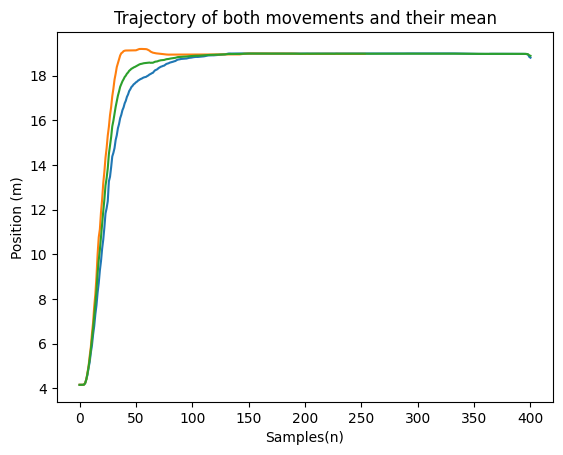

In [14]:
time = np.zeros((num1,))
for i, val in enumerate(mvt2_resampled):
    time[i] = val

last = time[i]

for j in range(i+1, num1):
    time[j] = last
mv2_resampled = time

mvm_mean = np.mean(np.vstack((mvt1_resampled, mv2_resampled)), axis = 0)
#Affichage
plt.figure()   
plt.plot(mvt1_resampled/1000)
plt.plot(mvt2_resampled/1000)
plt.plot(mvm_mean/1000)
plt.xlabel('Samples(n)')
plt.ylabel('Position (m)')
plt.title('Trajectory of both movements and their mean') 
plt.show()

Task 4. Load this file, visualize, and briefly describe the dataset. Also display the average trajectory
for each condition.

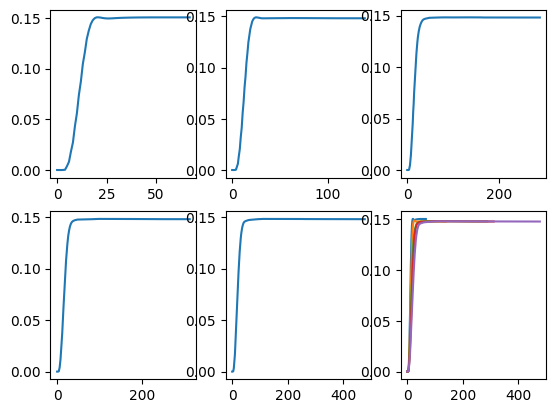

In [15]:
# Pickle
import pickle
with open("data\extracted_data_extended", "rb") as  handle:
    dataset = pickle.load(handle)
    dict_1 = dataset['1']
    dict_2 = dataset['2']
    dict_3 = dataset['3']
    dict_4 = dataset['4']
    dict_5 = dataset['5']
moy_1 = np.mean(dict_1, axis=0)/1000 #Mettre en mètre
moy_2 = np.mean(dict_2, axis=0)/1000
moy_3 = np.mean(dict_3, axis=0)/1000
moy_4 = np.mean(dict_4, axis=0)/1000
moy_5 = np.mean(dict_5, axis=0)/1000
x_1 = np.arange(0, len(moy_1), 1)
x_2 = np.arange(0, len(moy_2), 1)
x_3 = np.arange(0, len(moy_3), 1)
x_4 = np.arange(0, len(moy_4), 1)
x_5 = np.arange(0, len(moy_5), 1)

fig , axs = plt.subplots(nrows=2, ncols=3)
axs[0,0].plot(x_1, moy_1, label = '1')
axs[0,1].plot(x_2, moy_2, label = '2')
axs[0,2].plot(x_3, moy_3, label = '3')
axs[1,0].plot(x_4, moy_4, label = '4')
axs[1,1].plot(x_5, moy_5, label = '5')
axs[1,2].plot(x_1, moy_1, label = '1')
axs[1,2].plot(x_2, moy_2, label = '2')
axs[1,2].plot(x_3, moy_3, label = '3')
axs[1,2].plot(x_4, moy_4, label = '4')
axs[1,2].plot(x_5, moy_5, label = '5')

Task 5. For each condition, determine by the eye when the average movement ends (i.e., when it
levels off).

By the eye the average of movement ends at 0.15m

### 2 Single-joint forearm dynamics


Task 6. Put our system in the matrix form x˙ = F x + Gu, with x =
"
θ
˙θ
#
and u = τ . This form is
useful because it is the general form of a linear system, for which many results exist

Task 7. Use the Euler forward approximation x˙(t) = x[(k+1)T]−x[kT]/
T
to find the equivalents of F and
G in discrete time.

![Example Image](lqr.jpg)


### 3 Linear Quadratic Regulator


Task 8. Express J as a function of V .

J = V_0(z). J is the total cost of the forearm trajectory and V is the cost from a position to the end of the trajectory.

### LQR and Real Data



Task 9. Write a function that “solves” the LQR (i.e., computes P, K and u) for any A, B, C, Q,
QF , R.

In [16]:
def LQR(A, B, C, Q, Qf, R, N):
    x = np.zeros((N-1, 2))
    P = np.zeros((N-1, 2, 2))
    K = np.zeros((N-1, 1, 2))
    u = np.zeros(N-1)
    x[0] = np.array([1, 0])
    P[-1] = Qf
    y = np.zeros((N-1, 2))
    y[0] = C @ x[0]
    J = np.zeros(N-1)
    for k in [N-2-i for i in range(N-2)]:
        P[k - 1] = Q + A.T @ P[k] @ A - A.T @ P[k] @ B @ np.linalg.inv(R + B.T @ P[k] @ B) @ B.T @ P[k] @ A
    for t in range(N-1):
        K[t] = - np.linalg.inv(R + B.T @ P[t] @ B) @ B.T @ P[t] @ A

    for t in range(N-1):
        u[t] = K[t] @ np.asmatrix(x[t]).T
        
        if (t != N - 2):
            x[t + 1] = (A @ np.asmatrix(x[t]).T + np.asmatrix(B * u[t])).T
            y[t+1] = C @ x[t]
    for t in range(N-1):
        J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
    return x, y, u, J
            
    

Task 10. Simulate trajectories that result from an optimal control law determined by the LQR, using
ρ = 10−3
, and

C:\Users\laure\AppData\Local\Temp\ipykernel_12484\1944147869.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T


<Figure size 640x480 with 0 Axes>

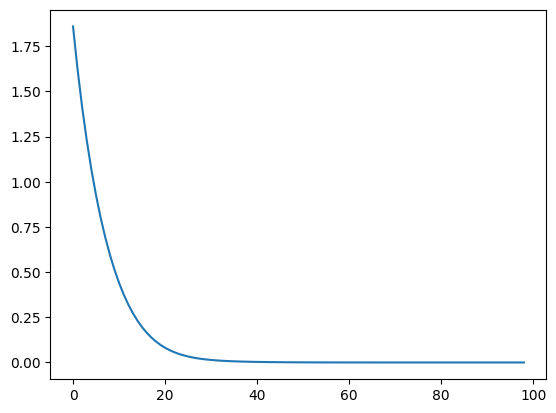

<Figure size 640x480 with 0 Axes>

In [17]:
I = 0.25
b = 0.2
N = 100
T = 0.01
roh = 0.001
A = np.array([[1, T], [0, 1 - T*b/I]])
B = np.array([[0], [T/I]])
C = np.array([[1, 0]])
Qf = C.T @ C
Q = Qf
R = roh 
x, y, u, J = LQR(A, B, C, Q, Qf, R, N)
plt.plot(J)
plt.figure()


Y is the position of the forearm at the instant t

Task 11. Try out with multiple values of ρ and compare. Comment on the differences between solutions.


C:\Users\laure\AppData\Local\Temp\ipykernel_12484\1944147869.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T


<Figure size 640x480 with 0 Axes>

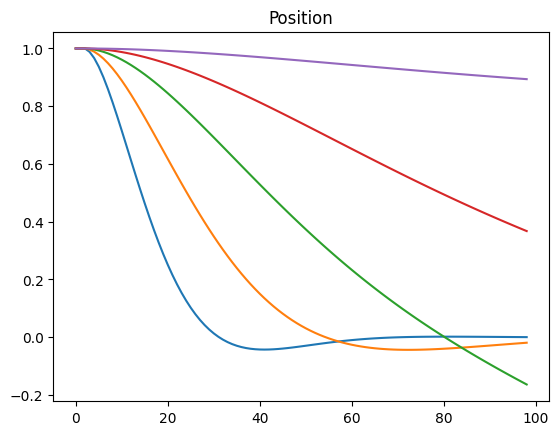

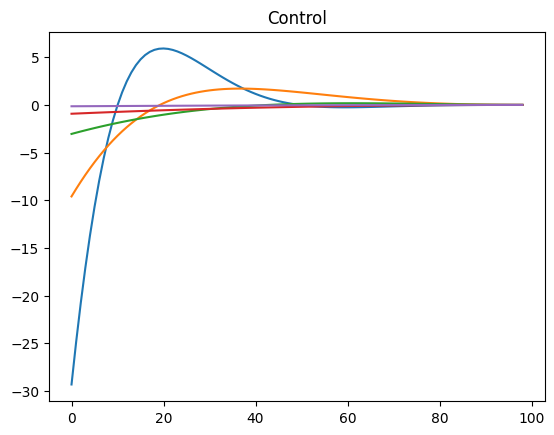

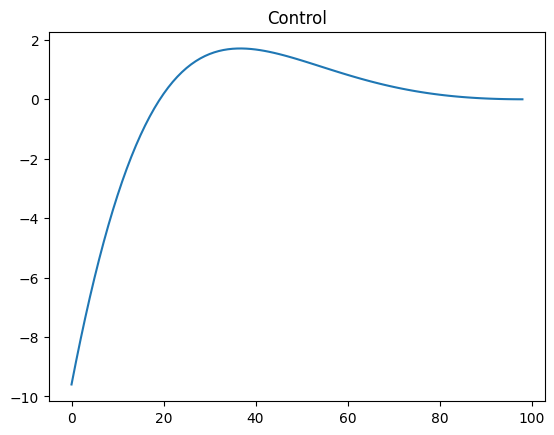

<Figure size 640x480 with 0 Axes>

In [18]:
#Multiple roh 
roh = [0.001, 0.01, 0.1, 1, 10]
A = np.array([[1, T], [0, 1 - T*b/I]])
B = np.array([[0], [T/I]])
C = np.array([[1, 0]])
Qf = C.T @ C
Q = Qf
R = roh 
for i in range(len(roh)):
    x, y, u, J = LQR(A, B, C, Q, Qf, R[i], N)
    plt.plot(y[:,0], label = 'roh = ' + str(roh[i]))
    plt.title('Position')
plt.figure()
for i in range(len(roh)):
    x, y, u, J = LQR(A, B, C, Q, Qf, R[i], N)
    plt.plot(u)
    plt.title('Control')
plt.figure()

x, y, u, J = LQR(A, B, C, Q, Qf, R[1], N)
plt.plot(u, label = 'roh = ' + str(roh[i]))
plt.title('Control')
plt.figure()


According to the value of roh, the distance of the forearm would be smaller, roh and J are proportionals.

Task 12. Now, use the 5 average trajectories from the dataset, and determine ρ for each condition,
by finding the value of ρ that produces a trajectory that best matches the average trajectory of that
condition.


In [19]:
def LQR(A, B, C, Q, Qf, R, N):
    x = np.zeros((N, 2))
    P = np.zeros((N, 2, 2))
    K = np.zeros((N, 1, 2))
    u = np.zeros(N)
    x[0] = np.array([0.15, 0])
    P[-1] = Qf
    y = np.zeros((N, 2))
    y[0] = C @ x[0]
    J = np.zeros(N)
    for k in [N-1-i for i in range(N-1)]:
        P[k - 1] = Q + A.T @ P[k] @ A - A.T @ P[k] @ B @ np.linalg.inv(R + B.T @ P[k] @ B) @ B.T @ P[k] @ A
    for t in range(N):
        K[t] = - np.linalg.inv(R + B.T @ P[t] @ B) @ B.T @ P[t] @ A

    for t in range(N):
        u[t] = K[t] @ np.asmatrix(x[t]).T
        
        if (t != N - 1):
            x[t + 1] = (A @ np.asmatrix(x[t]).T + np.asmatrix(B * u[t])).T
            y[t+1] = C @ x[t]
    for t in range(N):
        J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
    return x, y, u, J
            
    

In [23]:
def diff_function(roh,*args):              
    (A, B, C, Q, Qf, N, mean) = args
    R = roh
    x, y , u, J = LQR(A, B, C, Q, Qf, R, N)
    y = 0.15 - x[:,0]
    dist = np.linalg.norm(y - mean)
    return dist

In [24]:
#define the parameters
I = 0.25
b = 0.2
N = 100
T = 0.01
roh = 0.01
A = np.array([[1, T], [0, 1 - T*b/I]])
B = np.array([[0], [T/I]])
C = np.array([[1, 0]])
Qf = C.T @ C
Q = Qf
R = roh 


C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])


Best value for R : 0.00035


C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np

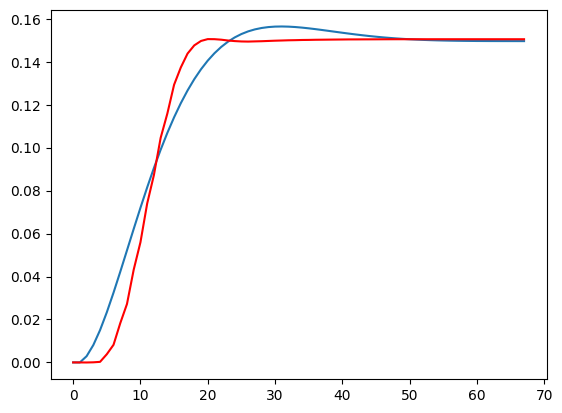

In [25]:
N = len(moy_1) # We want the generated trajectory to be the same size as the reel data trajectory

sol = minimize(diff_function, 1, args = (A, B, C, Q, Qf, N, moy_1))                                                              
                                                              
R = sol.x                                                    
                                                             
x, y, u, J = LQR(A, B, C, Q, Qf, R, N)
y  = x[:,0]
print('Best value for R :', round(R[0], 5))
plt.figure()
plt.plot(0.15 - y)
plt.plot(moy_1, 'r')


Task 13. Visualize the fitted trajectories on top of the average trajectories. How good is the fit? You
can also play with values of Q and QF , and see if you can get better fits.

C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np

Best value of roh is 0.00062 for mean_2


C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np

Best value of roh is 0.00157 for mean_3
Best value of roh is 0.00226 for mean_4


C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np

Best value of roh is 0.00452 for mean_5


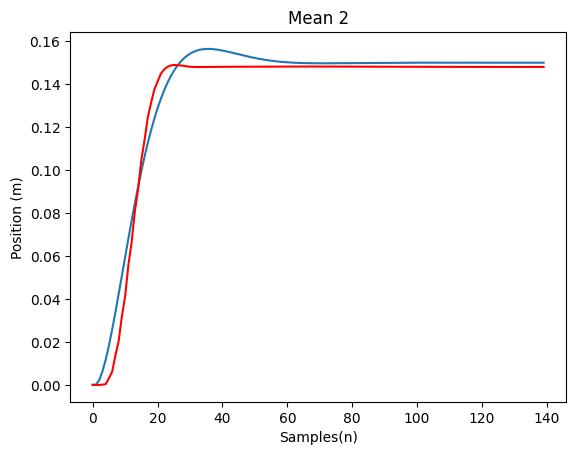

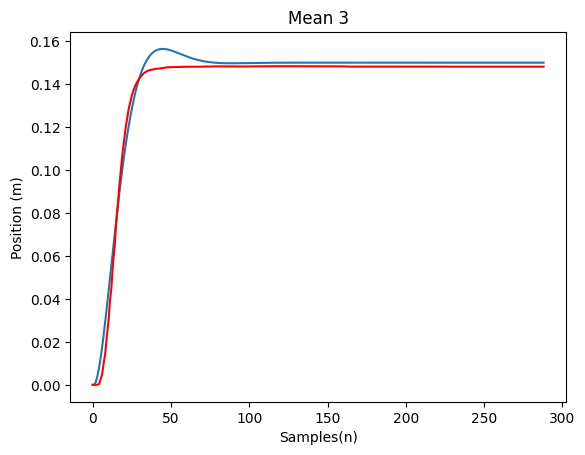

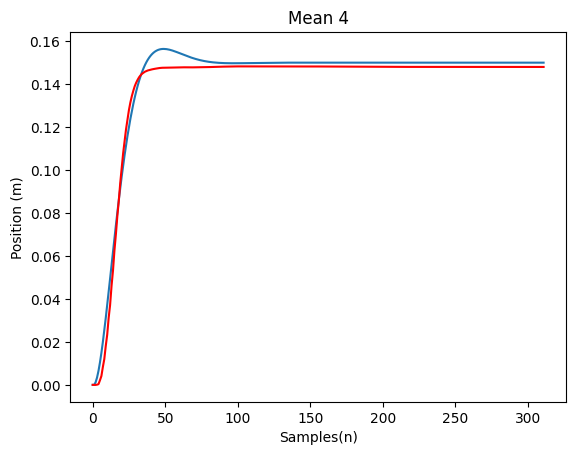

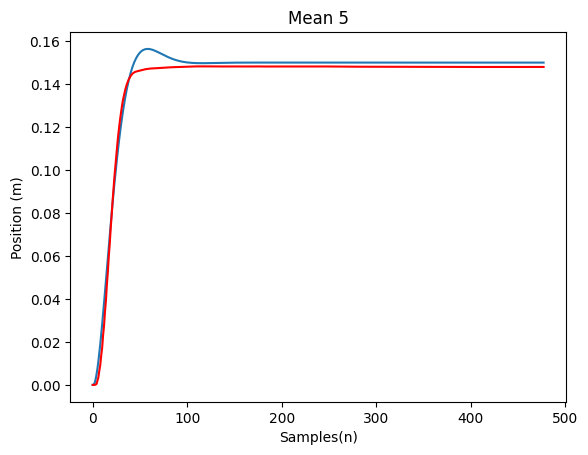

In [26]:
mean = [moy_2, moy_3, moy_4, moy_5]
for i in range(4):
    N = len(mean[i]) # We want the generated trajectory to be the same size as the reel data trajectory
    sol = minimize(diff_function, 1, args = (A, B, C, Q, Qf, N, mean[i]))                                                              
                                                              
    R = sol.x                                                    
                                                             
    x, y, u, J = LQR(A, B, C, Q, Qf, R, N)
    y  = x[:,0]
    print(f'Best value of roh is {round(R[0],5)} for mean_{i+2}')
    plt.figure()
    plt.plot(0.15 - y)
    plt.plot(mean[i], 'r')
    plt.xlabel('Samples(n)')
    plt.ylabel('Position (m)')
    plt.title('Mean ' + str(i+2))

C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np

Best value of roh for C = [0.1 0. ] is -0.74081 for mean_1
Best value of roh for C = [0.3 0. ] is 3e-05 for mean_1


C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np

Best value of roh for C = [0.5 0. ] is 9e-05 for mean_1


C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np

Best value of roh for C = [0.7 0. ] is 0.00017 for mean_1


C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np.asmatrix(x[t]).T
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[t] = ((x[t]).T @ Q @ (x[t]) + u[t] * R * u[t]) + (x[N-2]).T @ Q @ (x[N-2])
C:\Users\laure\AppData\Local\Temp\ipykernel_12484\2578517684.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[t] = K[t] @ np

Best value of roh for C = [1 0] is 0.00035 for mean_1
Best value of roh for C = [5 0] is 0.00879 for mean_1


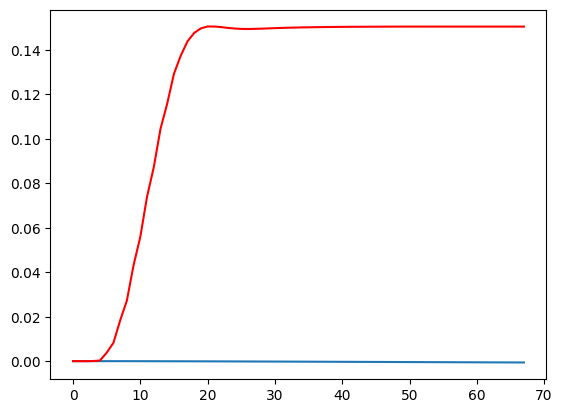

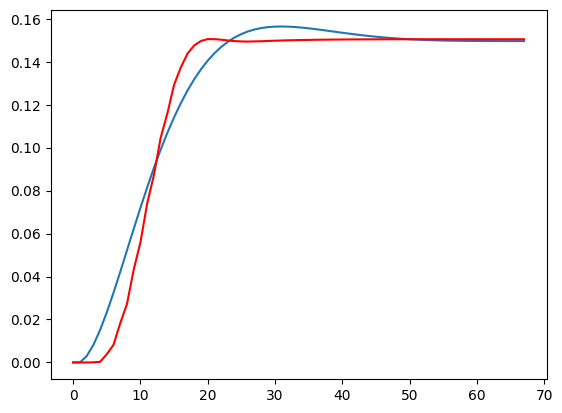

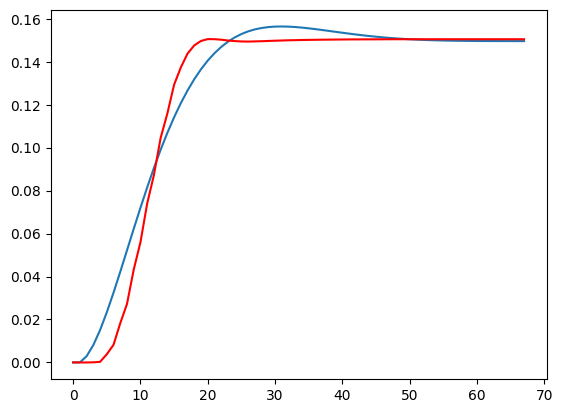

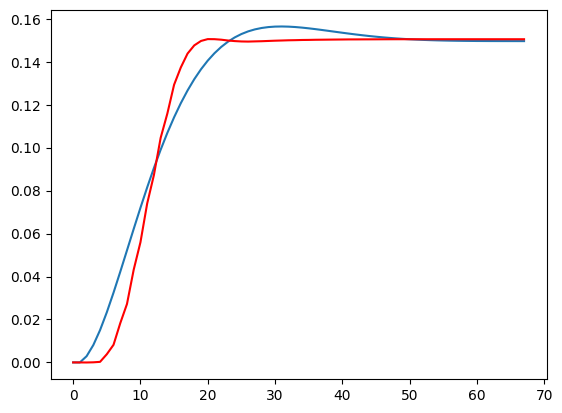

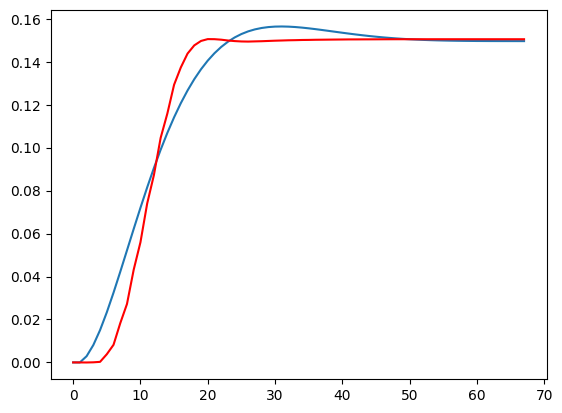

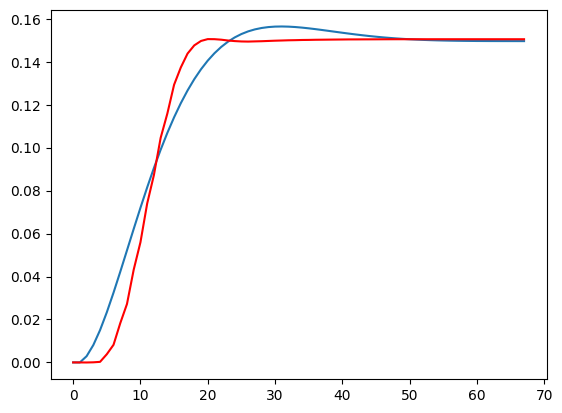

In [27]:
I = 0.25
b = 0.2
N = 100
T = 0.01
roh = 0.01
A = np.array([[1, T], [0, 1 - T*b/I]])
B = np.array([[0], [T/I]])
C = np.array([[1, 0]])
Qf = C.T @ C
Q = Qf
R = roh 
list_C = [np.array([[0.1,0]]), np.array([[0.3,0]]), np.array([[0.5,0]]), np.array([[0.7,0]]), np.array([[1,0]]), np.array([[5,0]])]
for C in list_C:
    Qf = C.T @ C
    Q = Qf
    N = len(moy_1) # We want the generated trajectory to be the same size as the reel data trajectory

    sol = minimize(diff_function, 1, args = (A, B, C, Q, Qf, N, moy_1))                                                              
                                                                
    R = sol.x                                                    
                                                                
    x, y, u, J = LQR(A, B, C, Q, Qf, R, N)
    y  = x[:,0]
    print(f'Best value of roh for C = {C[0]} is {round(R[0],5)} for mean_1')
    plt.figure()
    plt.plot(0.15 - y)
    plt.plot(moy_1, 'r')